In [2]:
# load outputs from the previous member : 

import numpy as np
import matplotlib.pyplot as plt

X_centered = np.load("X_centered.npy")  
mean_face = np.load("mean_face.npy")     
L = np.load("L.npy")                     

print("Shapes:")
print("X_centered:", X_centered.shape)
print("mean_face:", mean_face.shape)
print("L (cov matrix):", L.shape)

Shapes:
X_centered: (8544, 10000)
mean_face: (10000,)
L (cov matrix): (8544, 8544)


In [3]:
# Eigen decomposition of reduced covariance matrix : 

# L = X_centered * X_centered^T (small covariance: N x N)
eigenvalues, eigenvectors = np.linalg.eigh(L)

# Sort eigenvalues and vectors in descending order
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

print("Eigenvalues shape:", eigenvalues.shape)
print("Eigenvectors shape:", eigenvectors.shape)

Eigenvalues shape: (8544,)
Eigenvectors shape: (8544, 8544)


In [4]:
# Compute eigenfaces : 

# Convert eigenvectors of L (N x N) to eigenvectors of covariance matrix (D x D)
# Eigenfaces = X_centered.T * eigenvectors
eigenfaces = np.dot(X_centered.T, eigenvectors)

# Normalize eigenfaces
eigenfaces = eigenfaces / np.linalg.norm(eigenfaces, axis=0)

print("Eigenfaces shape:", eigenfaces.shape) 


Eigenfaces shape: (10000, 8544)


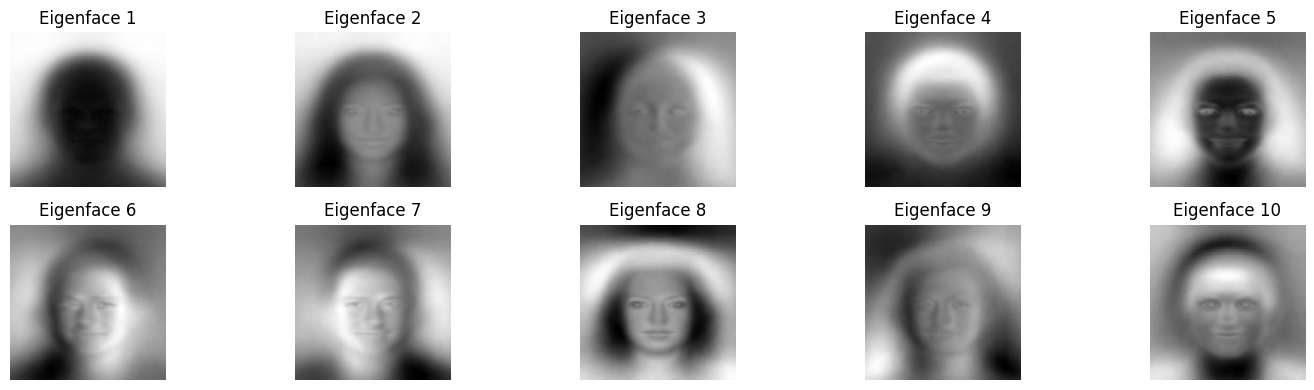

In [7]:
# Visualize top 10 eigenfaces : 

num_faces = 10
plt.figure(figsize=(15, 4))

for i in range(num_faces):
    plt.subplot(2, 5, i + 1)
    plt.imshow(eigenfaces[:, i].reshape(100, 100), cmap='gray')
    plt.title(f"Eigenface {i+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()

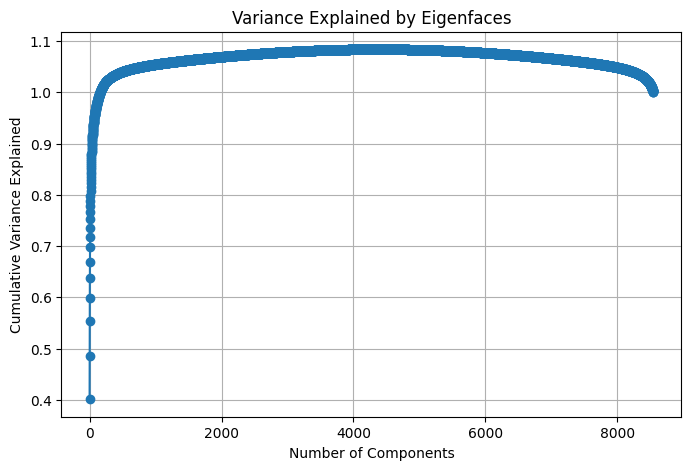

In [8]:
# Variance explained : 

variance_explained = eigenvalues / np.sum(eigenvalues)
cumulative_variance = np.cumsum(variance_explained)

plt.figure(figsize=(8,5))
plt.plot(cumulative_variance, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Explained")
plt.title("Variance Explained by Eigenfaces")
plt.grid(True)
plt.show()

In [9]:
# Save eigenfaces : 

np.save("eigenfaces.npy", eigenfaces)
np.save("eigenvalues.npy", eigenvalues)